In [1]:
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm

tqdm.pandas()
from wekeypedia import WikipediaPage as Page

# qui sont personnes qui énoncent le deadname dans l'article ?

## article

In [2]:
page = Page('Chelsea_Manning', lang='fr')

In [40]:
revisions = (
    pd
    .DataFrame
    .from_records(page.get_revisions())
    .set_index('revid')
)

revisions

,parentid,user,userid,timestamp,size,sha1,contentformat,contentmodel,comment,*,anon
revid,,,,,,,,,,,
213078305,213074072,Cymbella,316223,2024-03-05T13:35:19Z,65080,d04ef73a4963672590b9abbc80020d18c74cc1dc,text/x-wiki,wikitext,/* Retour aux États-Unis */ style,{{homon|Manning}}\n{{Nom protégé}}\n{{Infobox ...,NaN
213074072,213073964,Chouette bougonne,4364626,2024-03-05T10:51:07Z,65092,43d85c1b04a6ae3fc2edc14de66e944f20eff16f,text/x-wiki,wikitext,Annulation de la [[Special:Diff/213073964|modi...,{{homon|Manning}}\n{{Nom protégé}}\n{{Infobox ...,NaN
213073964,213073846,Nattes à chat,1372207,2024-03-05T10:47:17Z,65136,8f7278cdad94fda6a4f2793564384ad5a6c97131,text/x-wiki,wikitext,Ajout de {{[[Modèle:Désaccord de pertinence|Dé...,{{Désaccord de pertinence|date=mars 2024}}\n{{...,NaN
213073846,213073767,Chouette bougonne,4364626,2024-03-05T10:43:25Z,65092,43d85c1b04a6ae3fc2edc14de66e944f20eff16f,text/x-wiki,wikitext,Annulation de la [[Special:Diff/213073767|modi...,{{homon|Manning}}\n{{Nom protégé}}\n{{Infobox ...,NaN
213073767,213070331,Nattes à chat,1372207,2024-03-05T10:40:57Z,65130,0078220eb8337292b9609f41db561956389c40ad,text/x-wiki,wikitext,Ajout de {{[[Modèle:Article non neutre|Article...,{{Article non neutre|date=mars 2024}}\n{{homon...,NaN
...,...,...,...,...,...,...,...,...,...,...,...
55885071,55855880,82.234.40.89,0,2010-08-05T20:06:06Z,3209,268905c1fab752a4753f263f7b687d9bedc1c411,text/x-wiki,wikitext,,'''Bradley Manning''' (né en 1987) est un anna...,
55855880,55774595,Luckas-bot,414968,2010-08-04T20:07:22Z,3205,a5648276e079e211eb19dbd0a985d04c55f6dd59,text/x-wiki,wikitext,robot Ajoute: [[es:Bradley Manning]],'''Bradley Manning''' (né en 1987) est un anna...,NaN
55774595,55774530,84.164.59.139,0,2010-08-02T09:43:44Z,3182,3367b7c2dbb06761ea755ec510ffe74ec932014d,text/x-wiki,wikitext,création de la page depuis la version englaise...,'''Bradley Manning''' (né en 1987) est un anna...,


In [41]:
revisions.to_csv('../data/page-revisions/chelsea_manning.csv')

<Axes: xlabel='date'>

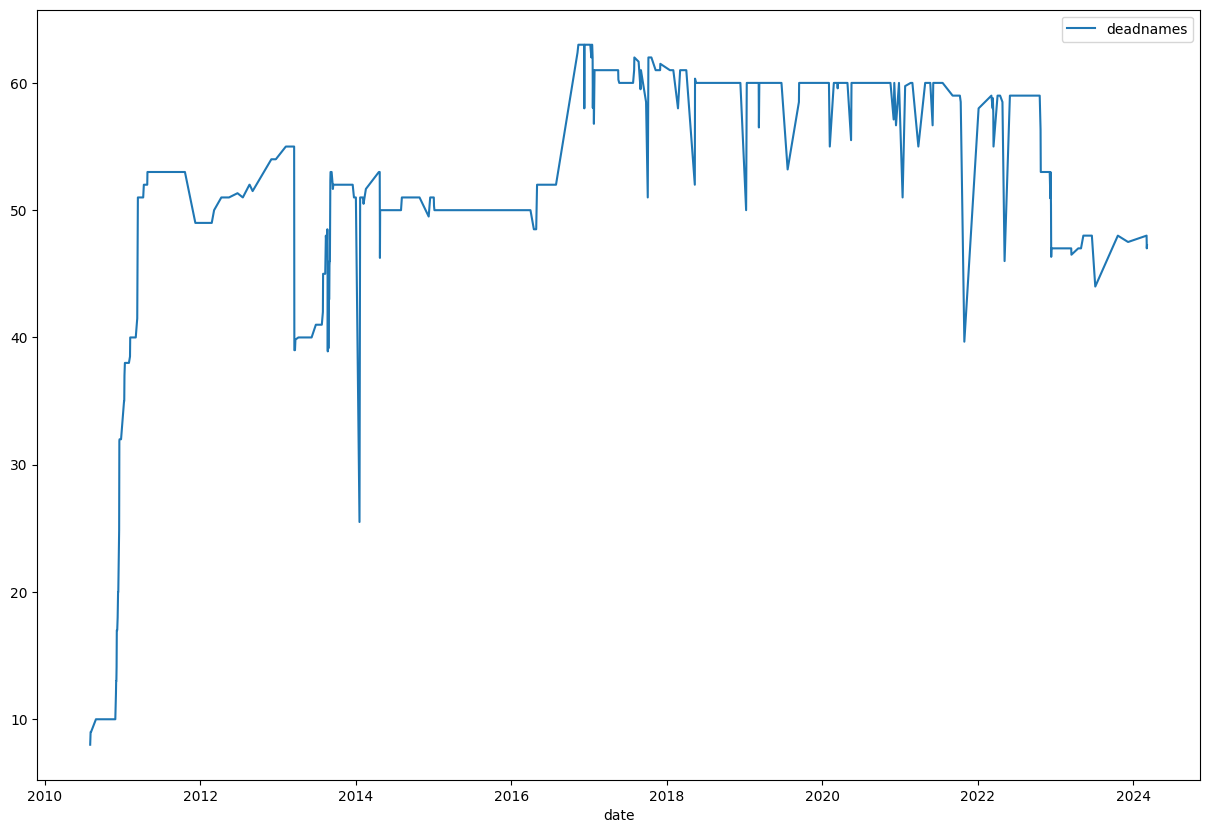

In [86]:
(
    revisions
    .assign(
        deadnames = lambda df: df['*'].apply(lambda x: x.lower().count('bradley '))
    )
    #.reset_index()
    [['timestamp', 'deadnames']]
    .assign(
        date = lambda df: pd.to_datetime(df.timestamp).dt.date
    )
    .groupby('date')
    .agg({'deadnames': 'mean'})
    .plot
    .line(
        figsize=(15,10)
    )
)

In [4]:
def get_diff(revid):
    return page.get_diff(revid)

diffs = revisions.revid.progress_apply(lambda x: page.extract_plusminus(get_diff(x))['added'] )

diffs

100%|████████████████████████████████████████████████████████████████████| 1060/1060 [06:10<00:00,  2.86it/s]


0                           [Sans, ,, commence à, vendre]
1                                                      []
2            [{{Désaccord de pertinence|date=mars 2024}}]
3                                                      []
4                 [{{Article non neutre|date=mars 2024}}]
                              ...                        
1055    [classés, parlent, a, arrêté, a, posées, secrè...
1056                             [[[es:Bradley Manning]]]
1057                                                   []
1058                    [[[nl:Bradley Manning]], ", ",  ]
1059                                                   []
Name: revid, Length: 1060, dtype: object

### depuis le coming out

In [64]:
(
    revisions
    .assign(
        deadname_count = [ ' '.join(added).lower().count('bradley') for added in diffs ]
    )
    # on ne garde que les contributions après son coming out
    .query('timestamp >= "2013-08-22"')
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

user
Sebk                 129
Malaria28            115
Skouratov             97
Mattho69              89
Chouette bougonne     58
Julien1978            40
Shev123               34
Hégésippe Cormier     31
Lebob                 30
Super Bazooka         23
Name: deadname_count, dtype: int64

### depuis le début du sondage

In [65]:
(
    revisions
    .assign(
        deadname_count = [ ' '.join(added).lower().count('bradley') for added in diffs ]
    )
    # début du sondage
    .query('timestamp >= "2024-02-12"')
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(20)
)

user
Sherwood6                     12
Triboulet sur une montagne     6
Anne Daemon                    0
Chouette bougonne              0
Cymbella                       0
Evpok                          0
Nattes à chat                  0
Name: deadname_count, dtype: int64

## Discussions

In [26]:
talk = Page('Discussion:Chelsea_Manning', lang='fr')

In [55]:
talk_revisions = (
    pd
    .DataFrame
    .from_records(talk.get_revisions_list())
    .assign(
        diff = lambda df: df.revid.progress_apply(lambda x: talk.get_diff(x)),
        deleted = lambda df: df['diff'].apply(lambda diff: talk.extract_plusminus(diff)['deleted']),
        added = lambda df: df['diff'].apply(lambda diff: talk.extract_plusminus(diff)['added']),
    )
    .set_index('revid')
)

talk_revisions

100%|██████████████████████████████████████████████████████████████████████| 534/534 [03:07<00:00,  2.85it/s]


,parentid,user,userid,timestamp,size,sha1,comment,anon,diff,deleted,added
revid,,,,,,,,,,,
213091227,213091000,Nattes à chat,1372207,2024-03-05T21:04:31Z,338436,89817fcf2d6de03ce74905ea4c2276d68b610220,/* Genre incohérent */ Réponse,NaN,"<tr>\n <td colspan=""2"" class=""diff-lineno"">Li...",[],"[, :Oui je suis bien d'accord avec vous ! Voil..."
213091000,213090254,Nattes à chat,1372207,2024-03-05T20:57:27Z,337654,a0c87bdad92bbaf7af66b270f487497f71e7f692,/* Article non neutre */ Réponse,NaN,"<tr>\n <td colspan=""2"" class=""diff-lineno"">Li...",[],[:::::les résultats du sondage ont été publiés...
213090254,213084708,Jugio,2718768,2024-03-05T20:33:52Z,337476,8c93dab9360db6fee7ec6aa0a3bd2b78fe3b3496,/* Genre incohérent */ nouvelle section,NaN,"<tr>\n <td colspan=""2"" class=""diff-lineno"">Li...",[],"[, == Genre incohérent ==, , Je ne comprends ..."
213084708,213080824,Cymbella,316223,2024-03-05T17:02:22Z,337042,ba5b8a48276d08e3b04ba6a911ac623e953ce370,/* Suppression des deuxièmes prénoms du RI */ ...,NaN,"<tr>\n <td colspan=""2"" class=""diff-lineno"">Li...",[],"[::Tout à fait d'accord pour supprimer, ces de..."
213080824,213080805,Sherwood6,4022033,2024-03-05T14:57:18Z,336795,b4f89de5db3f98122621d1f9716bc00ab72dcf44,/* Genre */ coq.,NaN,"<tr>\n <td colspan=""2"" class=""diff-lineno"">Li...",[us@age],[usage]
...,...,...,...,...,...,...,...,...,...,...,...
96021479,96021466,Sammyday,39429,2013-08-22T16:52:18Z,3585,625e0aec454fca968705df41d4bf2d2cff5965a1,"/* Movement a ""Chelsea Manning"" */ orthographe",NaN,"<tr>\n <td colspan=""2"" class=""diff-lineno"">Li...","[are, talking]","['ll, will, talk]"
96021466,96021458,Sammyday,39429,2013-08-22T16:51:43Z,3584,f2613c46406e9fe0cb9b585dfdd01d4b48640406,"/* Movement a ""Chelsea Manning"" */ +",NaN,"<tr>\n <td colspan=""2"" class=""diff-lineno"">Li...",[who],[which]
96021458,96020837,Sammyday,39429,2013-08-22T16:51:22Z,3582,8c27fa6bb52d1fc16c6e78ee8f89ad47ed4e641f,ans,NaN,"<tr>\n <td colspan=""2"" class=""diff-lineno"">Li...","[, == Movement a ""Chelsea Manning"" ==, Would s...","[, == Movement a ""Chelsea Manning"" ==, Would s..."


In [56]:
talk_revisions.to_csv('../data/page-diffs/discussion:chelsea_manning.csv')

### depuis le coming out

In [62]:
(
    talk_revisions
    .assign(
        deadname_count = lambda df: df.added.apply(lambda x: ' '.join(x).lower().count('bradley'))
    )
    # on ne garde que les contributions après son coming out
    .query('timestamp >= "2013-08-22"')
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

user
Hauru                   33
Jean-Jacques Georges    22
Sherwood6               17
Christophe Dioux        11
Euterpia                 7
Julien1978               7
Ash Crow                 6
Heddryin                 6
Fanchb29                 5
Gaz0line                 4
Name: deadname_count, dtype: int64

### depuis le début du sondage

In [63]:
(
    talk_revisions
    .assign(
        deadname_count = lambda df: df.added.apply(lambda x: ' '.join(x).lower().count('bradley'))
    )
    # depuis le sondage
    .query('timestamp >= "2024-02-12"')
    .groupby('user')
    .deadname_count
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

user
Sherwood6            17
Anne Daemon           3
Chouette bougonne     1
Lastrik               1
Nattes à chat         1
Cymbella              0
Evpok                 0
Jugio                 0
Lewisiscrazy          0
Pic-Sou               0
Name: deadname_count, dtype: int64